# PART1: TF

## SETUP

In [1]:
import tensorflow as tf

In [2]:
# !pip install mitdeeplearning --quiet
import mitdeeplearning as mdl
import numpy as np
import matplotlib.pyplot as plt

## 1.1

In [3]:
# 0 d
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [4]:
# 1 d
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.424213, 2.71821], tf.float64)

print(
    "`sports` is a {}-d Tensor with shape: {}".format(
        tf.rank(sports).numpy(), tf.shape(sports)
    )
)
print(
    "`numbers` is a {}-d Tensor with shape: {}".format(
        tf.rank(numbers).numpy(), tf.shape(numbers)
    )
)

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [5]:
### Defining higher-order Tensors ###

"""TODO: Define a 2-d Tensor"""
matrix = tf.constant([[1, 2], [3, 2]])  # TODO

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [6]:
"""TODO: Define a 4-d Tensor."""

# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10, 256, 256, 3])  # TODO

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [
    10,
    256,
    256,
    3,
], "matrix is incorrect shape"

In [7]:
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 2]], dtype=int32)>

## 1.2

In [8]:
a = tf.constant(15)
b = tf.constant(61)

tf.add(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=76>

In [9]:
### Defining Tensor computations ###


# Construct a simple computation function
def func(a, b):
    """TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply)."""
    print(f"a = {a}, b = {b}")
    c = tf.add(a, b)
    print(f"c = a+b = {a}+{b}={c}")
    d = tf.subtract(b, 1)
    print(f"d = b-1 = {b}-1 = {d}")
    e = tf.multiply(c, d)
    print(f"e = c*d = {e}")
    return e

In [10]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(e_out)

a = 1.5, b = 2.5
c = a+b = 1.5+2.5=4.0
d = b-1 = 2.5-1 = 1.5
e = c*d = 6.0
tf.Tensor(6.0, shape=(), dtype=float32)


## 1.3

In [11]:
# Define a custom dense layer


class OurDenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes

    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight(name="weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight(name="bias", shape=[self.n_output_nodes])

    def call(self, x):
        z = tf.matmul(x, self.W) + tf.expand_dims(self.b, axis=0)
        y = tf.sigmoid(z)
        return y


# Set the random seed for reproducibility
tf.keras.utils.set_random_seed(1)

# Create an instance of the custom layer
layer = OurDenseLayer(3)
layer.build((1, 2))

# Define an input tensor
x_input = tf.constant([[1, 2.0]], shape=(1, 2))

# Call the layer with the input tensor
y = layer.call(x_input)

# Print the output
print(y.numpy())

[[0.2626233  0.18934216 0.46882924]]


In [12]:
# Test the output (assuming mdl.lab1.test_custom_dense_layer_output is a valid testing function)
mdl.lab1.test_custom_dense_layer_output(y)

AssertionError: 
Arrays are not almost equal to 7 decimals
[FAIL] output is of incorrect value. expected [[0.27064407 0.1826951  0.50374055]] but got [[0.2626233  0.18934216 0.46882924]]
Mismatched elements: 3 / 3 (100%)
Max absolute difference: 0.0349113
Max relative difference: 0.06930414
 x: array([[0.2626233, 0.1893422, 0.4688292]], dtype=float32)
 y: array([[0.2706441, 0.1826951, 0.5037405]], dtype=float32)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3
model = Sequential()
dense_layer = Dense(n_output_nodes, activation="sigmoid")

model.add(dense_layer)

In [ ]:
x_input = tf.constant([[1, 2.0]], shape=(1, 2))
model_output = model(x_input).numpy()
model_output

array([[0.18752207, 0.23909676, 0.3213029 ]], dtype=float32)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense


class SubClassModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(SubClassModel, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation="sigmoid")

    def call(self, inputs):
        return self.dense_layer(inputs)

In [ ]:
n_output_nodes = 3
model = SubClassModel(n_output_nodes)
x_input = tf.constant([1, 2.0], shape=(1, 2))

model.call(x_input)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.82794297, 0.155684  , 0.567044  ]], dtype=float32)>

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense


class IdentityModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(
            n_output_nodes, activation="sigmoid")

    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x

In [ ]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1, 2.0]], shape=(1, 2))
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print(
    "Network output with activation: {}; network identity output: {}".format(
        out_activate.numpy(), out_identity.numpy()
    )
)

Network output with activation: [[0.57467866 0.61822414 0.88219965]]; network identity output: [[1. 2.]]


## 1.4 Automatic differentiation in TensorFlow

In [20]:
X = tf.Variable(3.0)  # lets say y = x^2 -> 3*3 -> 9
with tf.GradientTape() as tape:
    y = X**2

dy_dx = tape.gradient(y, X)  # dy/dx -> 2x -> 2*3 -> 6
# assert dy_dx.numpy() == 6.0
dy_dx.numpy()

6.0

In [25]:
tf.random.normal([1]).numpy()

array([-0.45701224], dtype=float32)

In [23]:
1e-2

0.01

Text(0, 0.5, 'x value')

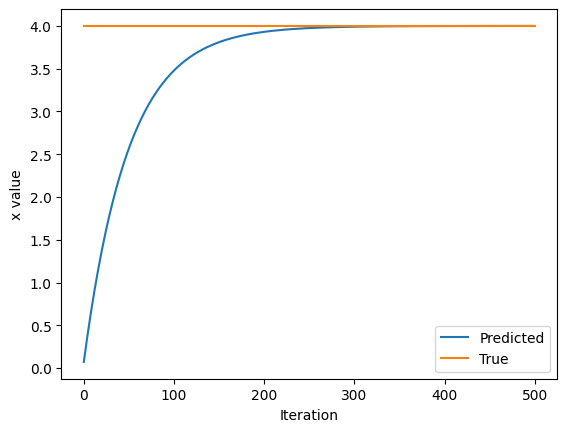

In [29]:
x = tf.Variable([tf.random.normal([1])])
learning_rate = 1e-2
history = []

x_f = 4  # f(x) # target value

for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f) ** 2  # L = (x-xf)^2 -> (-0.45 - 4)^2 -> 19.80

    grad = tape.gradient(loss, x)  # derivate of L wrt x -> 2*-.45 -> -.90
    new_x = x - learning_rate * grad  # (-.45) - [(.01) * (-.90)] -> -.441
    x.assign(new_x)
    history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(("Predicted", "True"))
plt.xlabel("Iteration")
plt.ylabel("x value")